In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

In [2]:
def polt_parity(y_cv_test,y_pred_test, y_cv_train=None,y_pred_train=None, label=None, ylim=[50,900]):
    """
    Function to make parity plots.
    """
    
    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
    r2_test = r2_score(y_cv_test,y_pred_test)
    
    if y_cv_train is None:
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4), sharey=True, sharex=True)
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
        
    ax1.scatter(y_cv_test,y_pred_test)
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "RMSE: %.2f"%rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f"%r2_test, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot(ylim, ylim, '--k')
    ax1.set_xlabel('True y', fontsize=14)
    ax1.set_ylabel('Pred y', fontsize=14)
    ax1.set_xlim(ylim[0],ylim[1])
    ax1.set_ylim(ylim[0],ylim[1])    
    
    if y_cv_train is not None: 
        rmse_train = np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
        r2_train = r2_score(y_cv_train,y_pred_train)
        
        ax2.scatter(y_cv_train,y_pred_train, c='m')
        ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)        
        ax2.text(0.95, 0.18, "RMSE: %.2f"%rmse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
        ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
        ax2.plot(ylim, ylim, '--k')

        ax2.set_xlabel('True y', fontsize=14)    
        ax2.set_xlim(ylim[0],ylim[1])
        ax2.set_ylim(ylim[0],ylim[1])    

    plt.tight_layout()
    plt.show()
    
    return None

In [3]:
data_train = pd.read_csv('training set.csv') 
X = data_train.iloc[:, 1:15]
y = data_train.iloc[0:, 15:16] 


data_test = pd.read_csv('test set.csv') 
xtest = data_test.iloc[:, 1:15]
ytest = data_test.iloc[:, 15:16] 

In [4]:
Xcols = X.columns
Xcols

Index(['Ni', 'Mn', 'Sn', 'Fe', 'Co', 'Cu', 'Al', 'Numa', 'anum', 'Ven',
       'avg Ven', 'En', 'Arc', 'mass'],
      dtype='object')

## 5 Fold CV

In [5]:
noise_estimated = 30
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e2))
kernel.k1.constant_value_bounds = (10**-2, 10**7)

In [6]:
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_estimated**2, n_restarts_optimizer=9
)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


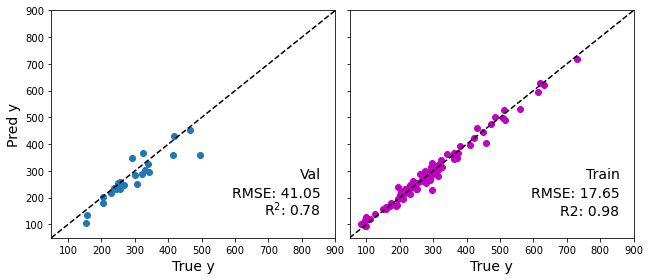

Kernel parameters: 309**2 * RBF(length_scale=8.96)
log marginal likelihood: -469.085
Root mean squared error: 41.05
Coefficient of determination: 0.78
RMSE Train :24.41
R2 Train :0.96


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


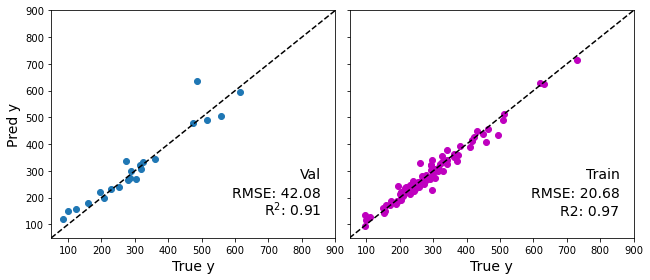

Kernel parameters: 316**2 * RBF(length_scale=9.61)
log marginal likelihood: -474.334
Root mean squared error: 42.08
Coefficient of determination: 0.91
RMSE Train :26.35
R2 Train :0.95


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


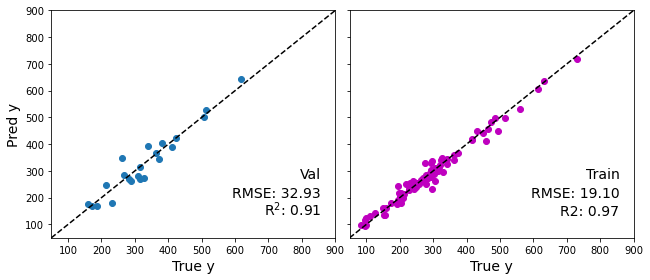

Kernel parameters: 309**2 * RBF(length_scale=9.17)
log marginal likelihood: -475.349
Root mean squared error: 32.93
Coefficient of determination: 0.91
RMSE Train :22.53
R2 Train :0.96


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


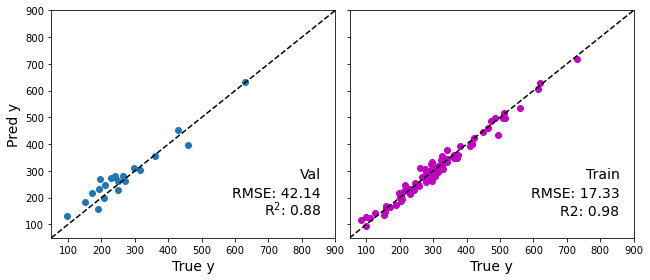

Kernel parameters: 327**2 * RBF(length_scale=8.93)
log marginal likelihood: -472.598
Root mean squared error: 42.14
Coefficient of determination: 0.88
RMSE Train :24.34
R2 Train :0.96


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


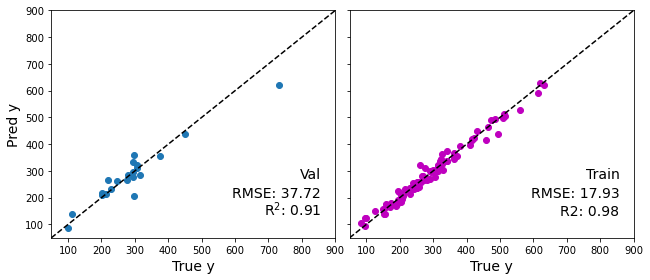

Kernel parameters: 287**2 * RBF(length_scale=8.59)
log marginal likelihood: -474.115
Root mean squared error: 37.72
Coefficient of determination: 0.91
RMSE Train :23.23
R2 Train :0.96


In [7]:
kf = KFold(n_splits=5)

errors = []
kernels = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]
 
    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = gaussian_process.fit(X_cv_train, y_cv_train)
    y_pred = model.predict(X)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))
    
    r2 = r2_score(y, y_pred)
    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train, label="Val")

    print("Kernel parameters: %s"%(model.kernel_))
    print("log marginal likelihood: %.3f" %model.log_marginal_likelihood_value_)
    print("Root mean squared error: %.2f" % rmse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'r2_cv': r2_train,             
             'rmse_val': rmse_val,
             'r2_val': r2_val,
             'rmse_train':rmse,
             'r2_train':r2}

    errors.append(error)
    kernels.append(model.kernel_)

In [8]:
errors_gpr_cv = pd.DataFrame(errors)
errors_gpr_cv

,kfold,rmse_cv,r2_cv,rmse_val,r2_val,rmse_train,r2_train
0,1,17.647043,0.980865,41.051923,0.781409,24.414916,0.958891
1,2,20.683956,0.967160,42.084370,0.912756,26.345006,0.952134
2,3,19.104832,0.974961,32.928320,0.914694,22.528971,0.964996
3,4,17.325328,0.978861,42.135335,0.875676,24.342408,0.959134
4,5,17.929416,0.977492,37.722259,0.906392,23.233171,0.962774


In [9]:
errors_gpr_cv[['rmse_val','r2_val']].mean()

rmse_val    39.184441
r2_val       0.878185
dtype: float64

In [10]:
kernels

[309**2 * RBF(length_scale=8.96),
 316**2 * RBF(length_scale=9.61),
 309**2 * RBF(length_scale=9.17),
 327**2 * RBF(length_scale=8.93),
 287**2 * RBF(length_scale=8.59)]

In [11]:
sigma_cs = []
sigma_ls = []

for k in kernels:
    sigma_cs.append(k.k1.constant_value)
    sigma_ls.append(k.k2.length_scale)
k_best = np.median(sigma_cs) * RBF(length_scale=np.median(sigma_ls), length_scale_bounds=(1e-4, 1e2))
k_best.k1.constant_value_bounds = (10**-2, 10**7)

In [12]:
np.median(sigma_cs), np.median(sigma_ls)

(95746.0109385706, 8.964661616960194)

In [13]:
k_best

309**2 * RBF(length_scale=8.96)

## My method

In [14]:
# kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)
# kernel += ConstantKernel(1.0) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e2))
# kernel.k1.constant_value_bounds = (10**-2, 10**6)

# # Set the noise level squared (alpha)
# noise_estimated = 30
# alpha = noise_estimated**2

# # Create a Gaussian Process Regression model
# gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=10)

# # Perform 5-fold cross-validation
# cv_scores_mse = -cross_val_score(gpr, X, y, cv=5, scoring='neg_mean_squared_error')
# cv_scores_r2 = cross_val_score(gpr, X, y, cv=5, scoring='r2')

# # Calculate mean RMSE and mean R2 scores
# mean_rmse = np.sqrt(np.mean(cv_scores_mse))
# mean_r2 = np.mean(cv_scores_r2)

# # Print the cross-validation scores
# print("Cross-Validation Scores:")
# for fold, (mse_score, r2_score) in enumerate(zip(cv_scores_mse, cv_scores_r2)):
#     print(f"Fold {fold + 1} - MSE: {mse_score:.4f}, R2: {r2_score:.4f}")

# # Print mean RMSE and mean R2 scores
# print(f"\nMean RMSE: {mean_rmse:.4f}")
# print(f"Mean R2: {mean_r2:.4f}")

In [15]:
# kernel

## Optimization

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
alpha_values = np.array([10,15,16,17,18,19,20,21,22,23,24,25,30, 40, 42, 45])**2
hyper_params = {'alpha':alpha_values}

kernel = k_best.k1.constant_value * RBF(length_scale=k_best.k2.length_scale, length_scale_bounds=(1e-4, 1e2))
kernel.k1.constant_value_bounds = (10**-2, 10**7)

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)

clf2 = GridSearchCV(gaussian_process, hyper_params, cv=5,
                   scoring='neg_mean_squared_error', verbose=0)

In [18]:
clf2.fit(X,y)

GridSearchCV(cv=5,
             estimator=GaussianProcessRegressor(kernel=309**2 * RBF(length_scale=8.96),
                                                n_restarts_optimizer=3),
             param_grid={'alpha': array([ 100,  225,  256,  289,  324,  361,  400,  441,  484,  529,  576,
        625,  900, 1600, 1764, 2025], dtype=int32)},
             scoring='neg_mean_squared_error')

In [19]:
rmse_list2 = np.sqrt(clf2.cv_results_['mean_test_score']*-1)
min_idx = np.argmin(rmse_list2)

alpha_opt = alpha_values[min_idx]

print()
print("Best CV error: %.4f" %rmse_list2[min_idx])
print("Optimal alpha: %.2f" %np.sqrt(alpha_opt))


Best CV error: 37.9912
Optimal alpha: 19.00


Text(0, 0.5, 'RMSE')

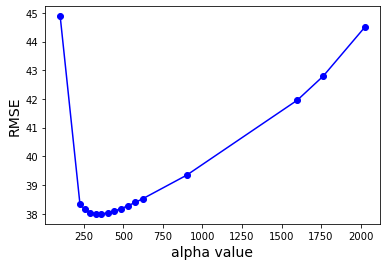

In [20]:
plt.plot(alpha_values, rmse_list2, '-bo')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('alpha value', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

In [21]:
gaussian_process = GaussianProcessRegressor(kernel=k_best, alpha=alpha_opt)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


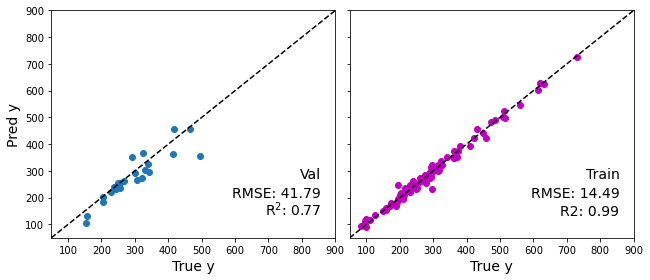

Kernel parameters: 328**2 * RBF(length_scale=8.69)
log marginal likelihood: -463.758
Root mean squared error: 41.79
Coefficient of determination: 0.77
RMSE Train :22.99
R2 Train :0.96


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


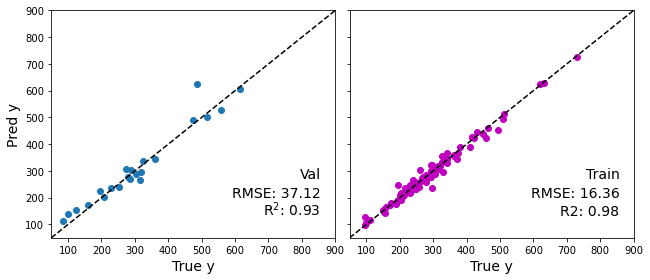

Kernel parameters: 330**2 * RBF(length_scale=8.67)
log marginal likelihood: -474.066
Root mean squared error: 37.12
Coefficient of determination: 0.93
RMSE Train :22.08
R2 Train :0.97


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


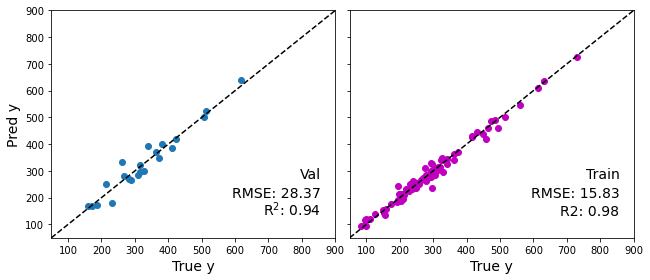

Kernel parameters: 324**2 * RBF(length_scale=8.72)
log marginal likelihood: -472.937
Root mean squared error: 28.37
Coefficient of determination: 0.94
RMSE Train :18.98
R2 Train :0.98


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


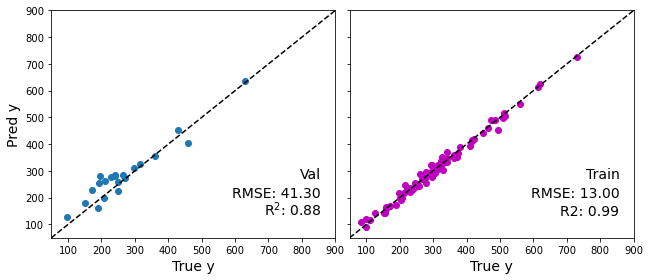

Kernel parameters: 352**2 * RBF(length_scale=8.51)
log marginal likelihood: -464.751
Root mean squared error: 41.30
Coefficient of determination: 0.88
RMSE Train :21.76
R2 Train :0.97


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


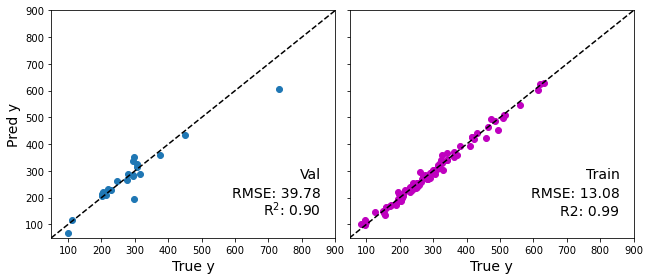

Kernel parameters: 296**2 * RBF(length_scale=7.85)
log marginal likelihood: -467.697
Root mean squared error: 39.78
Coefficient of determination: 0.90
RMSE Train :21.23
R2 Train :0.97


In [22]:
kf = KFold(n_splits=5)

errors = []
kernels = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = gaussian_process.fit(X_cv_train, y_cv_train)
    y_pred = model.predict(X)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))

    r2 = r2_score(y, y_pred)
    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train, label="Val")

    print("Kernel parameters: %s"%(model.kernel_))
    print("log marginal likelihood: %.3f" %model.log_marginal_likelihood_value_)
    print("Root mean squared error: %.2f" % rmse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'r2_cv': r2_train,             
             'rmse_val': rmse_val,
             'r2_val': r2_val,
             'mse_val': mse_val,
             'rmse_train':rmse,
             'r2_train':r2}

    errors.append(error)
    kernels.append(model.kernel_)

In [23]:
errors_gpr_cv_opt_alpha = pd.DataFrame(errors)
errors_gpr_cv_opt_alpha

,kfold,rmse_cv,r2_cv,rmse_val,r2_val,mse_val,rmse_train,r2_train
0,1,14.492108,0.987095,41.791313,0.773464,1746.513851,22.986812,0.963559
1,2,16.357091,0.979463,37.119587,0.932126,1377.863717,22.082023,0.966371
2,3,15.826121,0.982818,28.366795,0.936692,804.675065,18.981815,0.975151
3,4,12.999625,0.988099,41.296633,0.880576,1705.411922,21.760199,0.967344
4,5,13.078070,0.988024,39.777118,0.895916,1582.219133,21.230400,0.968915


In [24]:
np.sqrt(errors_gpr_cv_opt_alpha['mse_val'].mean())

37.99127186076115

In [25]:
# Again finding the best kernel parameters for final model training
sigma_cs = []
sigma_ls = []

print("Previous k_best: ", k_best)

for k in kernels:
    sigma_cs.append(k.k1.constant_value)
    sigma_ls.append(k.k2.length_scale)
k_opt = np.median(sigma_cs) * RBF(length_scale=np.median(sigma_ls), length_scale_bounds=(1e-4, 1e2))
k_opt.k1.constant_value_bounds = (10**-2, 10**7)

print("New k_best: ", k_opt)

Previous k_best:  309**2 * RBF(length_scale=8.96)
New k_best:  328**2 * RBF(length_scale=8.67)


## Final GPR model

In [26]:
# IMP NOTE: The optimizer is set to None

gaussian_process = GaussianProcessRegressor(kernel=k_opt, alpha=alpha_opt, optimizer=None)

model = gaussian_process.fit(X,y)
print()
print(model.kernel_, model.kernel)


328**2 * RBF(length_scale=8.67) 328**2 * RBF(length_scale=8.67)


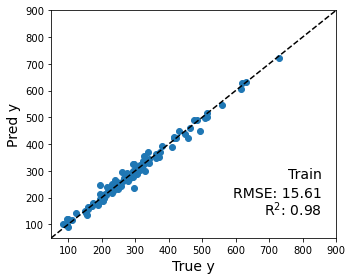

Kernel parameters: 328**2 * RBF(length_scale=8.67)
Root mean squared error: 15.61
Coefficient of determination: 0.98


In [27]:
y_pred = model.predict(X)

# Computing errors
rmse_train = np.sqrt(mean_squared_error(y, y_pred))
r2_train = r2_score(y, y_pred)

# Plot Parity plot
polt_parity(y,y_pred,label="Train")

print("Kernel parameters: %s"%(model.kernel_))
print("Root mean squared error: %.2f" % rmse_train)
print("Coefficient of determination: %.2f" % r2_train) 


## RFE CV

In [28]:
gaussian_process = GaussianProcessRegressor(
    kernel=k_opt, alpha=alpha_opt, n_restarts_optimizer=3
)

In [29]:
def run_cv(ml_model, X, y, n_cv = 5, normalize=False):
    """
    Function to run Cross-validation
    """
    kf = KFold(n_splits=n_cv)

    errors = []

    for idx, (train, val) in enumerate(kf.split(X)):
        
        if normalize:
            _X_cv_train = X.values[train]
            _X_cv_val = X.values[val]

            X_cv_train = scaler.fit_transform(_X_cv_train)
            X_cv_val = scaler.transform(_X_cv_val)
            
        else:
            X_cv_train = X.values[train]
            X_cv_val = X.values[val]

        y_cv_train = y.values[train]
        y_cv_val = y.values[val]    

        # Model fit and prediction
        model = ml_model.fit(X_cv_train, y_cv_train)
        y_pred_val = model.predict(X_cv_val)

        # Computing errors
        rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))

        errors.append(rmse_val)   
    return np.mean(np.array(errors))

In [30]:
# Greedy selection of features with minimum CV RMSE

current_Xcols = Xcols
rfe_results = {"rmse_cv":[], "sel_cols":[]}
for rfe_run_idx in range(10):

    _rmse_cvs = []
    for rm_idx, rm_col in enumerate(current_Xcols):
        _Xcols = current_Xcols.drop(rm_col)

        # Get CV error for this set
        _rmse_cv = run_cv(gaussian_process, X[_Xcols], y)
        _rmse_cvs.append(_rmse_cv)

    _rmse_cvs = np.array(_rmse_cvs)

    worst_col = current_Xcols[np.argmin(_rmse_cvs)]
    print("Worst column %s" %worst_col)
    print("RFE RMSE CV %.2f" %np.min(_rmse_cvs))
    current_Xcols = current_Xcols.drop(worst_col)
    rfe_results["rmse_cv"].append(np.min(_rmse_cvs))
    rfe_results["sel_cols"].append(current_Xcols)

Worst column Ni
RFE RMSE CV 31.63
Worst column mass
RFE RMSE CV 31.40
Worst column Ven
RFE RMSE CV 31.39
Worst column Arc
RFE RMSE CV 31.39
Worst column En
RFE RMSE CV 31.39
Worst column avg Ven
RFE RMSE CV 31.39
Worst column anum
RFE RMSE CV 31.40


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Worst column Co
RFE RMSE CV 33.90
Worst column Al
RFE RMSE CV 36.55


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Worst column Cu
RFE RMSE CV 43.64


In [31]:
n_features= len(Xcols) - np.arange(len(rfe_results["rmse_cv"])) - 1 

In [32]:
min_idx = np.argmin(rfe_results["rmse_cv"])
rmse = rfe_results["rmse_cv"][min_idx]
sel_features = rfe_results["sel_cols"][min_idx]
sel_features

Index(['Mn', 'Sn', 'Fe', 'Co', 'Cu', 'Al', 'Numa', 'anum', 'avg Ven'], dtype='object')

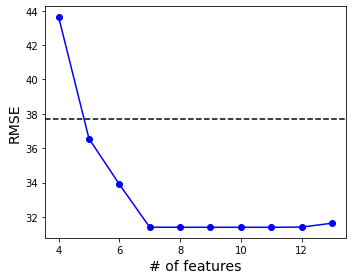

In [33]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(n_features, rfe_results["rmse_cv"], '-bo')
ax1.axhline(errors_gpr_cv_opt_alpha['rmse_val'].mean(), linestyle='--', color='k')
#ax1.set_ylim(70,100)
ax1.set_xlabel('# of features', fontsize=14)
ax1.set_ylabel('RMSE', fontsize=14)
plt.tight_layout()

In [34]:
print("Initial number of features", len(Xcols))
print("Selected number of features", len(sel_features))

Initial number of features 14
Selected number of features 9


In [35]:
print("Mean square error with RFE (eV^2): ", rmse)

Mean square error with RFE (eV^2):  31.392230462202633


In [36]:
X2 = X[sel_features]
X2

,Mn,Sn,Fe,Co,Cu,Al,Numa,anum,avg Ven
0,43.00,10.0,0.00,6.0,0.0,0.0,4,28.8500,0.279029
1,39.00,12.0,0.00,0.0,0.0,0.0,3,29.4700,0.275195
2,39.00,11.0,0.00,2.0,5.0,0.0,5,29.2800,0.280055
3,48.00,10.0,0.00,0.0,0.0,0.0,3,28.7600,0.276773
4,46.00,10.5,0.00,0.0,0.0,0.5,4,28.8550,0.275689
...,...,...,...,...,...,...,...,...,...
106,47.50,10.5,0.00,0.0,0.0,0.0,3,28.8850,0.275056
107,38.15,10.7,1.35,6.0,0.0,0.0,5,29.1225,0.279045
108,37.00,13.0,0.00,0.0,0.0,0.0,3,29.7500,0.272605
109,45.00,5.0,0.00,0.0,0.0,0.0,3,27.7500,0.300901


## Optimization after feature elimination

In [37]:
alpha_values = np.array([10,15,16,17,18,19,20,21,22,23,24,25,30, 40, 42, 45])**2
hyper_params = {'alpha':alpha_values}

kernel = k_opt.k1.constant_value * RBF(length_scale=k_best.k2.length_scale, length_scale_bounds=(1e-4, 1e2))
kernel.k1.constant_value_bounds = (10**-2, 10**7)

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)

clf3 = GridSearchCV(gaussian_process, hyper_params, cv=5,
                   scoring='neg_mean_squared_error', verbose=0)

In [38]:
clf3.fit(X2,y)

GridSearchCV(cv=5,
             estimator=GaussianProcessRegressor(kernel=328**2 * RBF(length_scale=8.96),
                                                n_restarts_optimizer=3),
             param_grid={'alpha': array([ 100,  225,  256,  289,  324,  361,  400,  441,  484,  529,  576,
        625,  900, 1600, 1764, 2025], dtype=int32)},
             scoring='neg_mean_squared_error')

In [39]:
rmse_list2 = np.sqrt(clf2.cv_results_['mean_test_score']*-1)
min_idx = np.argmin(rmse_list2)

alpha_opt2 = alpha_values[min_idx]

print()
print("Best CV error: %.4f" %rmse_list2[min_idx])
print("Optimal alpha: %.2f" %np.sqrt(alpha_opt2))


Best CV error: 37.9912
Optimal alpha: 19.00


Text(0, 0.5, 'RMSE')

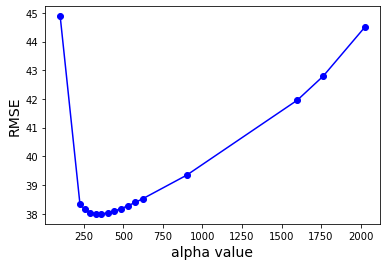

In [40]:
plt.plot(alpha_values, rmse_list2, '-bo')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('alpha value', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

In [41]:
gaussian_process = GaussianProcessRegressor(kernel=k_opt, alpha=alpha_opt2)

C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


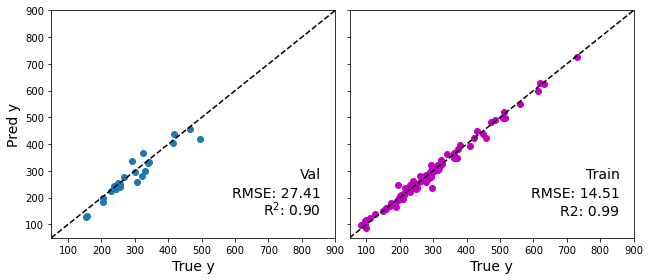

Kernel parameters: 329**2 * RBF(length_scale=7.05)
log marginal likelihood: -464.592
Root mean squared error: 27.41
Coefficient of determination: 0.90
RMSE Train :17.96
R2 Train :0.98


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


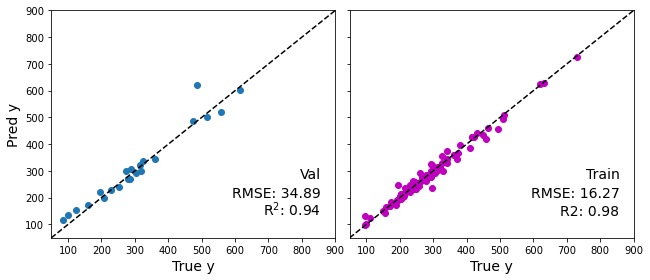

Kernel parameters: 317**2 * RBF(length_scale=7.2)
log marginal likelihood: -470.867
Root mean squared error: 34.89
Coefficient of determination: 0.94
RMSE Train :21.30
R2 Train :0.97


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


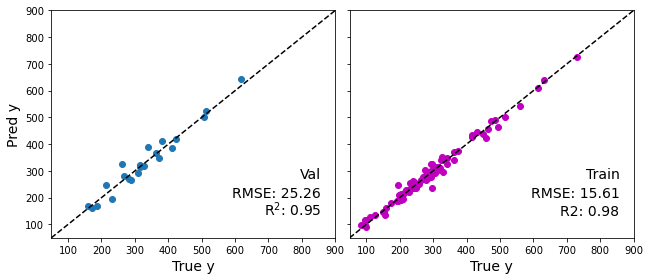

Kernel parameters: 332**2 * RBF(length_scale=7.41)
log marginal likelihood: -469.180
Root mean squared error: 25.26
Coefficient of determination: 0.95
RMSE Train :17.94
R2 Train :0.98


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


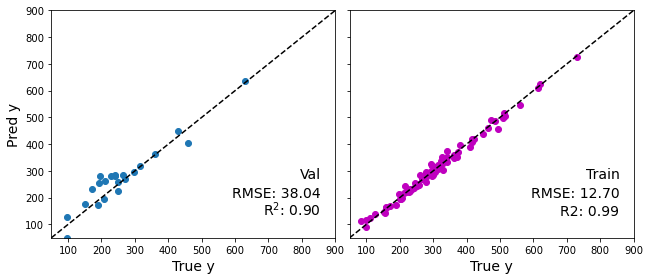

Kernel parameters: 354**2 * RBF(length_scale=7.22)
log marginal likelihood: -460.078
Root mean squared error: 38.04
Coefficient of determination: 0.90
RMSE Train :20.40
R2 Train :0.97


C:\Users\Harisankar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


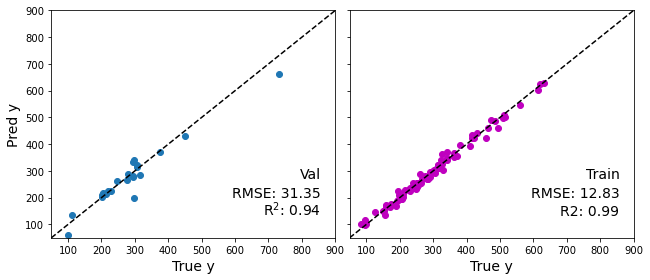

Kernel parameters: 310**2 * RBF(length_scale=6.74)
log marginal likelihood: -464.977
Root mean squared error: 31.35
Coefficient of determination: 0.94
RMSE Train :18.07
R2 Train :0.98


In [42]:
kf = KFold(n_splits=5)

errors = []
kernels = []

for idx, (train, val) in enumerate(kf.split(X2)):
    X_cv_train = X2.values[train]
    X_cv_val = X2.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = gaussian_process.fit(X_cv_train, y_cv_train)
    y_pred = model.predict(X2)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))

    r2 = r2_score(y, y_pred)
    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train, label="Val")

    print("Kernel parameters: %s"%(model.kernel_))
    print("log marginal likelihood: %.3f" %model.log_marginal_likelihood_value_)
    print("Root mean squared error: %.2f" % rmse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    print("RMSE Train :%.2f" % rmse)
    print("R2 Train :%.2f" % r2)
    
    error = {'kfold': idx+1,
             'rmse_cv': rmse_train,
             'r2_cv': r2_train,             
             'rmse_val': rmse_val,
             'r2_val': r2_val,
             'mse_val': mse_val,
             'rmse_train':rmse,
             'r2_train':r2}

    errors.append(error)
    kernels.append(model.kernel_)

In [43]:
errors_gpr_cv_opt_alpha2 = pd.DataFrame(errors)
errors_gpr_cv_opt_alpha2

,kfold,rmse_cv,r2_cv,rmse_val,r2_val,mse_val,rmse_train,r2_train
0,1,14.511747,0.987060,27.414818,0.902515,751.572256,17.963465,0.977746
1,2,16.274503,0.979669,34.891098,0.940031,1217.388694,21.299038,0.968714
2,3,15.609391,0.983285,25.264865,0.949780,638.313424,17.940849,0.977802
3,4,12.700857,0.988640,38.038440,0.898677,1446.922939,20.398961,0.971302
4,5,12.825044,0.988483,31.352119,0.935338,982.955386,18.074893,0.977469


In [44]:
errors_gpr_cv_opt_alpha2['r2_cv'].mean()

0.9854275253484751

In [45]:
np.sqrt(errors_gpr_cv_opt_alpha2['mse_val'].mean())

31.740046309017615

In [46]:
# # IMP NOTE: The optimizer is set to None

# gaussian_process = GaussianProcessRegressor(kernel=k_opt, alpha=alpha_opt, optimizer=None)

model = gaussian_process.fit(X2,y)
print()
print(model.kernel_, model.kernel)


327**2 * RBF(length_scale=7.11) 328**2 * RBF(length_scale=8.67)


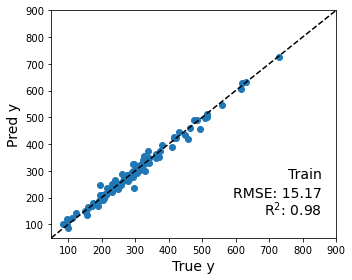

Kernel parameters: 327**2 * RBF(length_scale=7.11)
Root mean squared error: 15.17
Coefficient of determination: 0.98


In [47]:
y_pred = model.predict(X2)


rmse_train = np.sqrt(mean_squared_error(y, y_pred))
r2_train = r2_score(y, y_pred)

# Plot Parity plot
polt_parity(y,y_pred,label="Train")

print("Kernel parameters: %s"%(model.kernel_))
print("Root mean squared error: %.2f" % rmse_train)
print("Coefficient of determination: %.2f" % r2_train) 


In [48]:
X3 = xtest[sel_features]
X3

,Mn,Sn,Fe,Co,Cu,Al,Numa,anum,avg Ven
0,36.5,13.5,0,0,0.0,0,3,29.875,0.270962
1,46.0,10.0,0,0,0.0,1,4,28.670,0.277293
2,35.9,14.3,0,0,4.5,0,4,30.114,0.269310
3,39.0,11.0,5,0,0.0,0,4,29.150,0.276844
4,41.0,8.0,0,1,0.0,0,4,28.520,0.290323


## Test set predictions

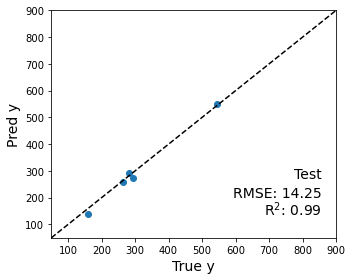

Kernel parameters: 327**2 * RBF(length_scale=7.11)
Root mean squared error: 14.25
Coefficient of determination: 0.987441


In [49]:
model = gaussian_process.fit(X2,y)
ypred = model.predict(X3)
rmse_test = np.sqrt(mean_squared_error(ytest, ypred))
r2_test = r2_score(ytest, ypred)

# Plot Parity plot
polt_parity(ytest,ypred,label="Test")

print("Kernel parameters: %s"%(model.kernel_))
print("Root mean squared error: %.2f" % rmse_test)
print("Coefficient of determination: %.6f" % r2_test) 

In [50]:
r2_test

0.9874409374143488

In [51]:
test_pre = pd.concat([data_test.loc[:, ['NiMn']], ytest, pd.DataFrame(ypred)], axis=1)
test_pre.rename(columns={'T': 'True', 0: 'predict'}, inplace=True)
test_pre

,NiMn,True,predict
0,Ni50Mn36.5Sn13.5,282.0,291.253108
1,Ni43Mn46Sn10Al1,262.5,257.613850
2,Ni45.3Mn35.9Cu4.5Sn14.3,159.0,137.496229
3,Ni45Mn39Fe5Sn11,295.0,274.854419
4,Ni50Mn41Sn8Co1,544.0,550.095846


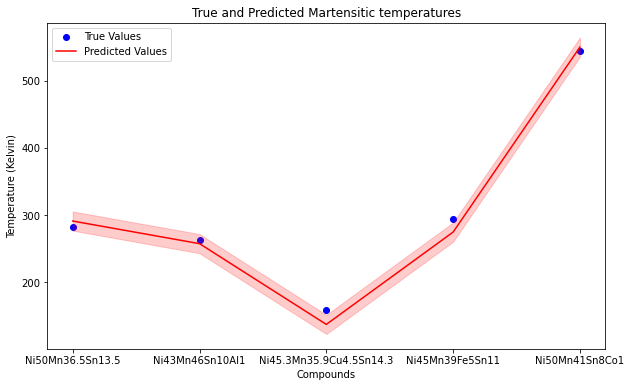

In [52]:
compounds = test_pre['NiMn'].tolist()
true_values = test_pre['True'].tolist()
predicted_values = test_pre['predict'].tolist()
rmse = rmse_test

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(compounds, true_values, color='blue', label="True Values")

# Plotting predicted values as a range
predicted_array = np.array(predicted_values)
lower_bound = predicted_array - rmse
upper_bound = predicted_array + rmse
plt.plot(compounds, predicted_values, color='red', label="Predicted Values")
plt.fill_between(compounds, lower_bound, upper_bound, color='red', alpha=0.2)

plt.xlabel("Compounds")
plt.ylabel("Temperature (Kelvin)")
plt.title("True and Predicted Martensitic temperatures")
plt.legend()

# Display the graph
plt.show()


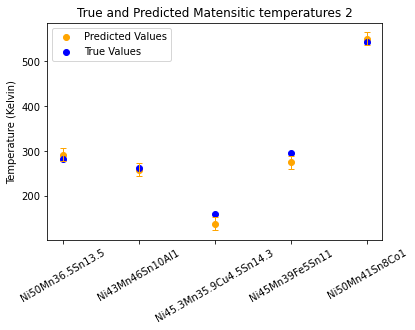

In [53]:
compounds = test_pre['NiMn'].tolist()
true_values = test_pre['True'].tolist()
predicted_values = test_pre['predict'].tolist()
predicted_array = np.array(predicted_values)
# Calculate the range of predicted values
predicted_lower = predicted_array - rmse_test
predicted_upper = predicted_array + rmse_test



fig, ax = plt.subplots()
ax.scatter(compounds, predicted_values, label="Predicted Values", color="orange")
ax.scatter(compounds, true_values, label="True Values", color="blue")

ax.errorbar(
    compounds, predicted_values,
    yerr=rmse_test, fmt='none', color="orange", capsize=3, elinewidth=1
)

# Formatting the plot
plt.xticks(rotation=30)

ax.set_ylabel("Temperature (Kelvin)")
ax.set_title("True and Predicted Matensitic temperatures 2")
ax.legend()

# Display the plot
plt.show()


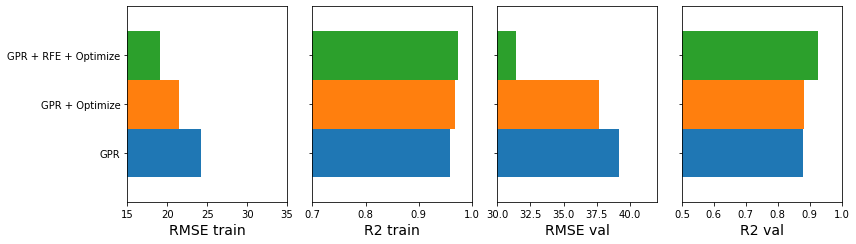

In [59]:
width = 0.1
labels = ['GPR','GPR + Optimize','GPR + RFE + Optimize']
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5), sharey=True)
    
for idx,e in enumerate([errors_gpr_cv,errors_gpr_cv_opt_alpha, errors_gpr_cv_opt_alpha2]):
    rmse_test = e.mean()['rmse_val']
    r2_test = e.mean()['r2_val']
    rmse_train = e.mean()['rmse_train']
    r2_train = e.mean()['r2_train']
    
    ax3.barh(0 + width*(idx-1), rmse_test, height=width, label=labels[idx], align='center')
    ax4.barh(0 + width*(idx-1), r2_test, height=width, label=labels[idx], align='center')
    ax1.barh(0 + width*(idx-1), rmse_train, height=width, label=labels[idx], align='center')
    ax2.barh(0 + width*(idx-1), r2_train, height=width, label=labels[idx], align='center')    
    
ax3.set_xlabel('RMSE val', fontsize=14)
ax4.set_xlabel('R2 val', fontsize=14)
ax1.set_xlabel('RMSE train', fontsize=14)
ax2.set_xlabel('R2 train', fontsize=14)  

ax1.set_yticks([-0.1,0,0.1])
ax1.set_yticklabels(labels)

ax1.set_ylim(-0.2,0.2)
ax3.set_xlim(30,42)
ax4.set_xlim(0.5,1)
ax1.set_xlim(15,35)
ax2.set_xlim(0.7,1)

plt.tight_layout()
plt.show()

In [55]:
import shap 

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [56]:
explainer = shap.Explainer(model.predict,X3)
shap_values = explainer(X3)

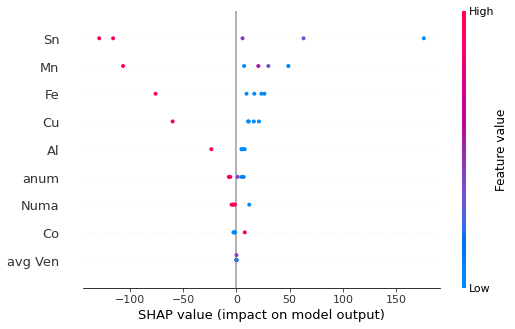

In [57]:
shap.plots.beeswarm(shap_values,show = False)

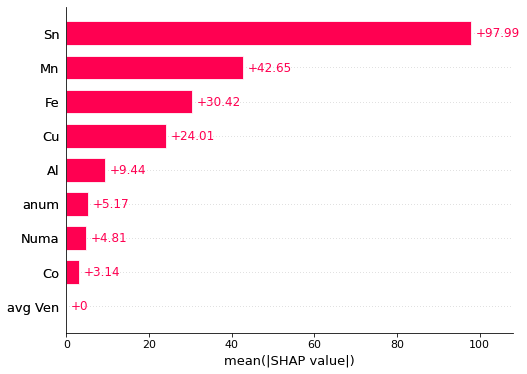

In [58]:
shap.plots.bar(shap_values,show = False)